**Homework 5 main file**

**Necessary Imports**

In [6]:
import pandas as pd 
import numpy as np
import ijson
import networkx as nx
import os
from tqdm import tqdm
from itertools import combinations
import ast
import matplotlib.pyplot as plt
import random
import seaborn as sns


**PART 1**

Paths

In [2]:
papers_path = r"C:\Users\Elias Antoun\Desktop\Data Science Sapienza\Semester 1\ADM\Assignments\Antoun_ADM_HW5\dblp.v12.json"

Steps taken to load the massive dataset

In [3]:
# Function to return a dataframe out of every chunk of data
def process_chunk(chunk):
    return pd.DataFrame(chunk)

# After (a lot of) trial and error, chunk size = 1000 was the best option
def chunk_generator(file_path, chunk_size=1000):
    """Generator function that yields chunks of data."""
    with open(file_path, 'rb') as file:
        objects = ijson.items(file, 'item')
        chunk = []
        for obj in objects:
            chunk.append(obj)
            if len(chunk) >= chunk_size:
                yield chunk
                chunk = []
        if chunk:
            yield chunk

# Process the file from the specified path in chunks, and save intermediate results to recover progress in case of crash
def process_file(file_path, chunk_size=1000, save_interval=10):
    chunks = chunk_generator(file_path, chunk_size)
    pbar = tqdm(desc="Processing chunks", unit="chunk")

    # empty df to store data
    processed_data = pd.DataFrame()

    for i, chunk in enumerate(chunks):
        df_chunk = process_chunk(chunk)
        processed_data = pd.concat([processed_data, df_chunk], ignore_index=True)
        pbar.update(1)

        # Save intermediate results every 10 chunks
        if (i + 1) % save_interval == 0:
            processed_data.to_csv(f'intermediate_result_{i + 1}.csv', index=False)
            processed_data = pd.DataFrame()  # Reset to free up memory

    pbar.close()
    return processed_data

final_data = process_file(papers_path)


Processing chunks: 4895chunk [20:04,  4.06chunk/s]


Join all the intermediate csv files together to generate a new complete dataframe, and save it as csv for easier access.

In [4]:
intermediate_files = [f for f in os.listdir() if f.startswith('intermediate_result_')]

papers_df = pd.concat([pd.read_csv(f) for f in intermediate_files], ignore_index=True)

# Save the combined data to a new file 
papers_df.to_csv('final_combined_data.csv', index=False)


_In case of kernel restart, run imports block and below this line only_

In [2]:
papers_df = pd.read_csv('final_combined_data.csv')

C:\Users\Elias Antoun\AppData\Local\Temp\ipykernel_21196\3251129193.py:1: DtypeWarning: Columns (5,6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  papers_df = pd.read_csv('final_combined_data.csv')


In [3]:
papers_df.head(10)

,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,references,indexed_abstract,fos,venue,alias_ids
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013,1,89.0,93.0,Conference,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/978-3-642-39476-8_19,"[2005687710, 2018037215]","{'IndexLength': 58, 'InvertedIndex': {'tool.':...","[{'name': 'Telecommunications network', 'w': D...",{'raw': 'International Conference on Human-Com...,NaN
1,1388,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",Further Results on Independence in Direct-Prod...,2000,1,NaN,NaN,Journal,NaN,56.0,NaN,NaN,NaN,NaN,"[{'name': 'Graph', 'w': Decimal('0.0')}, {'nam...","{'raw': 'Ars Combinatoria', 'id': 73158690, 't...",NaN
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011,1,137.0,144.0,Conference,Eurographics Association,NaN,NaN,10.2312/VAST/VAST11/137-144,"[1535888970, 1992876689, 1993710814, 203565334...","{'IndexLength': 201, 'InvertedIndex': {'illust...","[{'name': 'Statue', 'w': Decimal('0.40216')}, ...",{'raw': 'International Conference on Virtual R...,NaN
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009,6,597.0,602.0,Conference,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/978-3-642-11164-8_97,"[1560724230, 1986968751, 2156909104]","{'IndexLength': 64, 'InvertedIndex': {'standar...",[{'name': 'Autoregressive–moving-average model...,{'raw': 'Pattern Recognition and Machine Intel...,NaN
4,5411,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,0,99.0,102.0,Conference,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Computer vision', 'w': Decimal('0.4...",{'raw': 'International Conference on Computer ...,NaN
5,5781,"[{'name': 'Jovan Dj. Golic', 'id': 1237859792}...",Vectorial fast correlation attacks.,2004,2,247.0,NaN,Repository,NaN,2004.0,NaN,NaN,NaN,NaN,"[{'name': 'Pattern recognition', 'w': Decimal(...","{'raw': 'IACR Cryptology ePrint Archive', 'id'...",NaN
6,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011,0,331.0,335.0,Conference,"Springer, London",NaN,NaN,10.1007/978-1-4471-2155-8_42,"[2007942710, 2040446335, 2042901705, 2138296484]","{'IndexLength': 89, 'InvertedIndex': {'44': [7...","[{'name': 'Peak signal-to-noise ratio', 'w': D...",{'raw': 'International Symposium on Computer a...,NaN
7,6762,"[{'name': 'Pranay Chaudhuri', 'id': 2142249029...",A Self-Stabilizing Algorithm for Finding the C...,2003,0,1460.0,1463.0,Conference,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Computer science', 'w': Decimal('0....",{'raw': 'Parallel and Distributed Processing T...,NaN
8,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012,0,498.0,508.0,Conference,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/978-3-642-28490-8_52,"[141500162, 1977736041, 2057072261, 2495388083...","{'IndexLength': 83, 'InvertedIndex': {'before'...","[{'name': 'Ubiquitous commerce', 'w': Decimal(...",{'raw': 'Asian Conference on Intelligent Infor...,NaN
9,8763,"[{'name': 'Dominik Szajerman', 'org': 'Lodz Un...",Fur Visualisation for Computer Game Engines an...,2014,0,41.0,48.0,Conference,"Springer, Cham",NaN,NaN,10.1007/978-3-319-11331-9_6,"[2002239941, 2062162286, 2114709034]","{'IndexLength': 84, 'InvertedIndex': {'fur': [...","[{'name': 'Computer graphics (images)', 'w': D...",{'raw': 'International Conference on Computer ...,NaN


In [2]:
# Preprocess and sort papers by citation count using numpy
top_papers = papers_df.nlargest(10000, 'n_citation')
#top_papers = pd.read_csv('top_10000_papers.csv')
top_papers.head(10)

,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,references,indexed_abstract,fos,venue,alias_ids
0,2041404167,"[{'name': 'C. E. Shannon', 'org': 'External Or...",The Mathematical Theory of Communication,1949,48327,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 89, 'InvertedIndex': {'through...","[{'name': 'Applied mathematics', 'w': Decimal(...",NaN,NaN
1,1639032689,"[{'name': 'David E. Goldberg', 'id': 2102678951}]","Genetic algorithms in search, optimization, an...",1989,44175,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 75, 'InvertedIndex': {'researc...","[{'name': 'Genetic operator', 'w': Decimal('0....",NaN,NaN
2,2912565176,"[{'name': 'Lotfi A. Zadeh', 'id': 2252586558}]",Fuzzy sets,1996,42437,394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Data mining', 'w': Decimal('0.36889...","{'raw': 'Fuzzy sets, fuzzy logic, and fuzzy sy...",NaN
3,2151103935,"[{'name': 'David G. Lowe', 'org': 'Computer Sc...",Distinctive Image Features from Scale-Invarian...,2004,35541,91.0,110.0,Journal,Kluwer Academic Publishers,60.0,2.0,10.1023/B:VISI.0000029664.99615.94,"[19720318, 1541642243, 1560959218, 1676552347,...","{'IndexLength': 164, 'InvertedIndex': {'distor...","[{'name': 'Scale-invariant feature transform',...",{'raw': 'International Journal of Computer Vis...,"[2184229386, 2997701940]"
4,2911964244,"[{'name': 'Leo Breiman', 'org': 'Statistics De...",Random Forests,2001,34741,5.0,32.0,NaN,NaN,45.0,1.0,10.1023/A:1010933404324,"[1507255258, 1580948147, 1605688901, 197584664...","{'IndexLength': 160, 'InvertedIndex': {'but': ...","[{'name': 'AdaBoost', 'w': Decimal('0.55878')}...",{'raw': 'Machine Learning archive'},NaN
5,1973948212,"[{'name': 'David W. Hosmer', 'org': '‡Universi...",Applied Logistic Regression,1989,32053,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 47, 'InvertedIndex': {'for': [...","[{'name': 'Binomial regression', 'w': Decimal(...",{'raw': ''},"[2017629773, 2569957239, 2795977808, 279730213..."
6,2153635508,"[{'name': 'Chih-Chung Chang', 'org': 'National...",LIBSVM: A library for support vector machines,2011,31047,27.0,NaN,Journal,ACM,2.0,3.0,10.1145/1961189.1961199,"[1510526001, 1543810117, 1556115774, 156879334...","{'IndexLength': 75, 'InvertedIndex': {'been': ...","[{'name': 'Graph kernel', 'w': Decimal('0.4826...",{'raw': 'ACM Transactions on Intelligent Syste...,NaN
7,2156909104,"[{'name': 'Vladimir N. Vapnik', 'org': 'AT&T B...",The Nature of Statistical Learning Theory,1995,28886,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 34, 'InvertedIndex': {'algorit...","[{'name': 'Statistical learning theory', 'w': ...",{'raw': ''},NaN
8,1791587663,"[{'name': 'Fred D. Davis', 'org': 'Computer an...","Perceived usefulness, perceived ease of use, a...",1989,25855,319.0,340.0,Journal,Society for Information Management and The Man...,13.0,3.0,10.2307/249008,"[157213131, 1520103841, 1778357938, 1972888601...","{'IndexLength': 229, 'InvertedIndex': {'practi...","[{'name': 'Expectation confirmation theory', '...",{'raw': 'Management Information Systems Quarte...,NaN
9,2119821739,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ...",Support-Vector Networks,1995,22276,273.0,297.0,Journal,Kluwer Academic Publishers,20.0,3.0,10.1023/A:1022627411411,"[2087347434, 2154579312, 2168228682]","{'IndexLength': 122, 'InvertedIndex': {'very':...","[{'name': 'Online machine learning', 'w': Deci...","{'raw': 'Machine Learning', 'id': 62148650, 't...",NaN


Some explorative visualizations

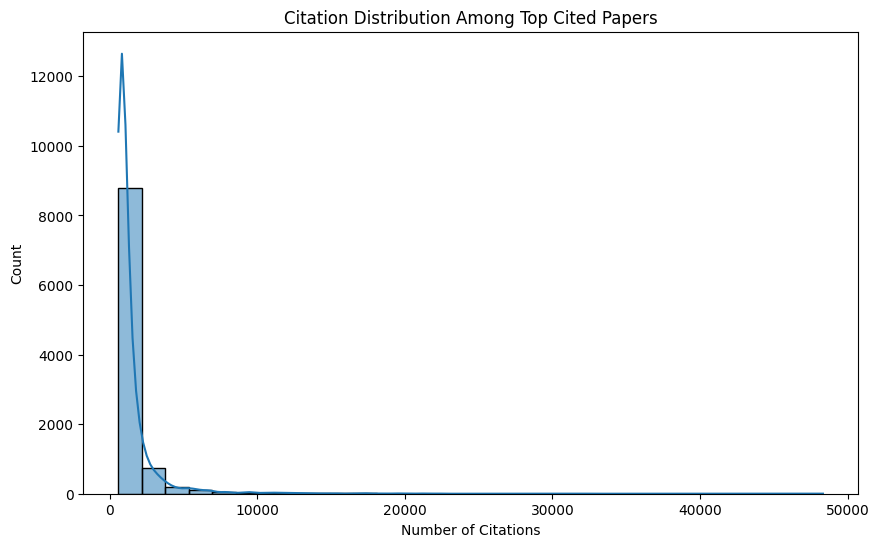

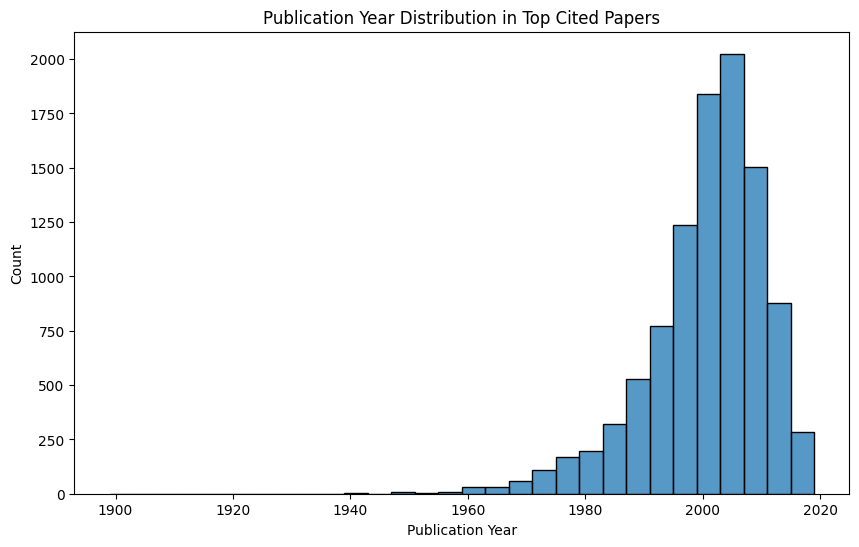

In [16]:
topics = []
for _, row in top_papers.iterrows():
    fos_str = row['fos']
    try:
        fos_list = ast.literal_eval(fos_str) if isinstance(fos_str, str) else fos_str
        topics.extend([fos['name'] for fos in fos_list if isinstance(fos, dict)])
    except:
        continue

# Example: Citation Distribution in Top Papers
plt.figure(figsize=(10, 6))
sns.histplot(top_papers['n_citation'], bins=30, kde=True)
plt.title('Citation Distribution Among Top Cited Papers')
plt.xlabel('Number of Citations')
plt.ylabel('Count')
plt.show()

# Example: Publication Year Distribution in Top Papers
plt.figure(figsize=(10, 6))
sns.histplot(top_papers['year'], bins=30, kde=False)
plt.title('Publication Year Distribution in Top Cited Papers')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.show()



In [7]:
# Citation Graph
citation_graph = nx.DiGraph()
for _, row in top_papers.iterrows():
    paper_id = row['id']
    references_str = row['references']
    
    # Safely evaluate the string as a list
    try:
        references = ast.literal_eval(references_str) if isinstance(references_str, str) else references_str
    except ValueError:
        # Skip if the conversion fails
        continue
    
    if isinstance(references, list):
        for ref in references:
            if ref in top_papers['id'].values:
                citation_graph.add_edge(paper_id, ref)


In [6]:
citation_graph

In [8]:
# Collaboration graph
collaboration_graph = nx.Graph()
for _, row in top_papers.iterrows():
    authors_str = row['authors']
    try:
        authors = ast.literal_eval(authors_str)
        # Extract a unique identifier for each author (e.g., name or ID)
        author_ids = [author.get('id') or author.get('name') for author in authors]
    except ValueError:
        author_ids = []
    
    for author_pair in combinations(author_ids, 2):
        if collaboration_graph.has_edge(*author_pair):
            collaboration_graph[author_pair[0]][author_pair[1]]['weight'] += 1
        else:
            collaboration_graph.add_edge(author_pair[0], author_pair[1], weight=1)


In [8]:
collaboration_graph

Example Graph from random subset

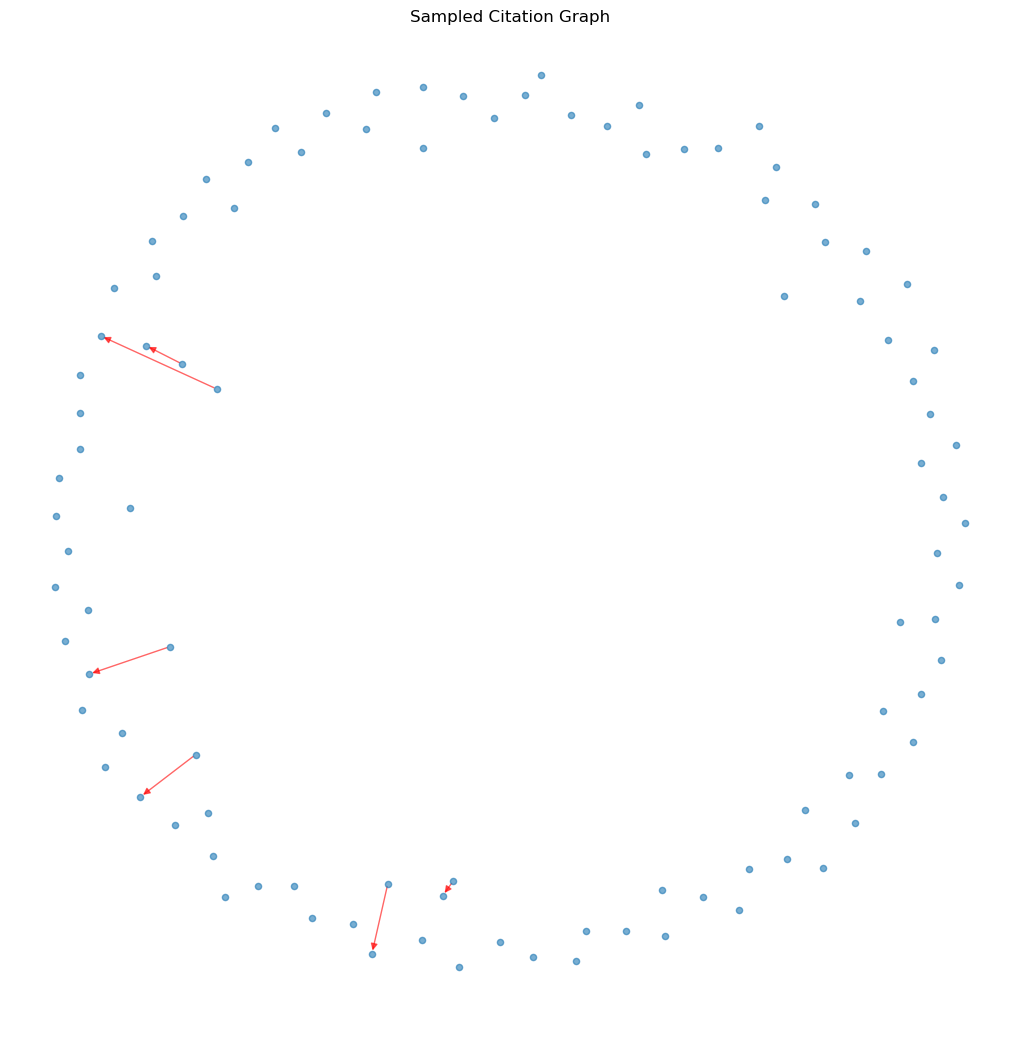

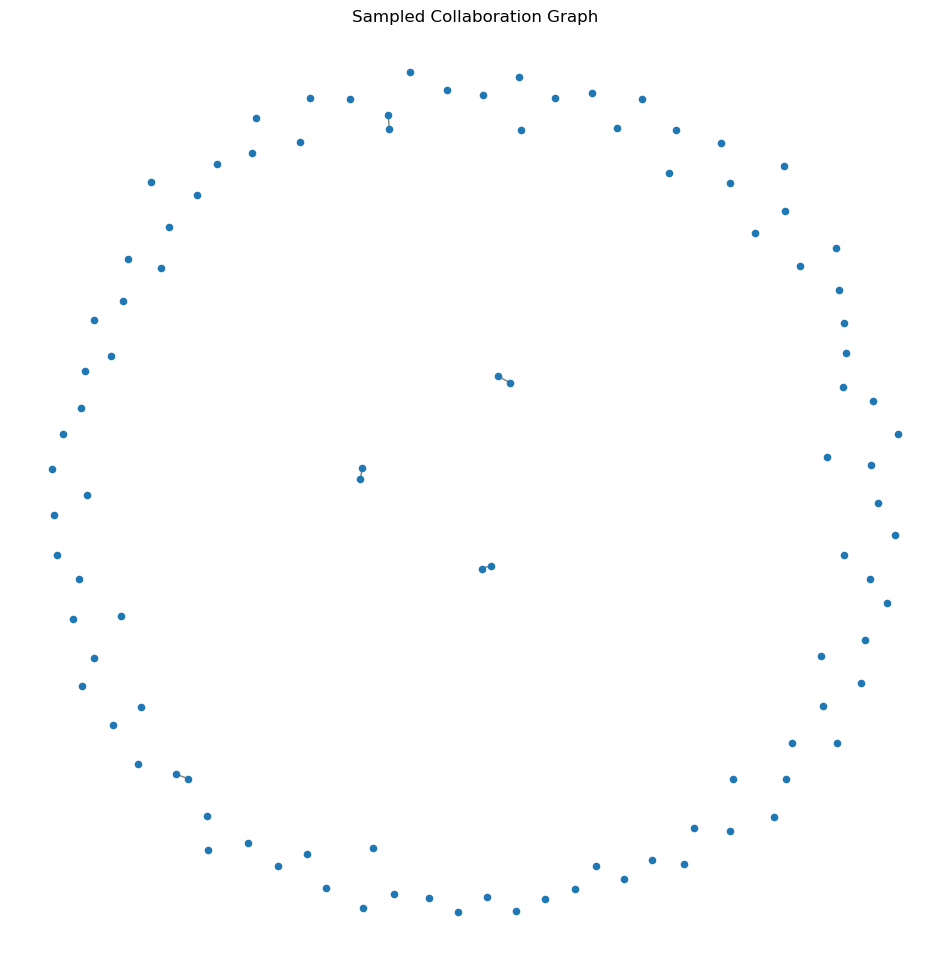

In [12]:
# Citation graph sample
sampled_nodes = random.sample(list(citation_graph.nodes()), 100)
subgraph = citation_graph.subgraph(sampled_nodes)

# Visualize the subgraph
plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=False, node_size=20, alpha=0.6, edge_color='r')
plt.title('Sampled Citation Graph')
plt.show()


# Collaboration graph sample
sampled_nodes = random.sample(list(collaboration_graph.nodes()), 100)
subgraph = collaboration_graph.subgraph(sampled_nodes)

# Visualize the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph)  # Positions for all nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=20)
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
plt.title('Sampled Collaboration Graph')
plt.axis('off')  # Turn off the axis
plt.show()


# Question 2.1

## Functionality 1 - Graph's features

In [3]:
def functionality_one(graph, name):
    # Number of nodes and edges
    num_nodes = len(graph.nodes())
    num_edges = len(graph.edges())
    # Graph density
    density = nx.density(graph)
    # Degree distribution
    degrees = [deg for node, deg in graph.degree()]
    degree_distribution = np.histogram(degrees, bins=np.arange(min(degrees), max(degrees) + 1))
    # Average degree
    average_degree = np.mean(degrees)
    # Graph hubs
    percentile_95 = np.percentile(degrees, 95)
    graph_hubs = [node for node, deg in graph.degree() if deg > percentile_95]
    # Density assessment
    density_threshold = 0.1  # Define a threshold for density (can vary based on context)
    is_dense = "Dense" if density >= density_threshold else "Sparse"
    return {
      "Number of nodes": num_nodes,
      "Number of edges": num_edges,
      "Graph density": density,
      "Degree distribution": degree_distribution,
      "Average degree": average_degree,
      "Graph hubs": graph_hubs,
      "Graph density status": "Dense" if is_dense else "Sparse"}
# print (functionality_one(citation_graph, "Citation Graph"))

In [9]:
print (functionality_one(citation_graph, "Citation Graph"))

{'Number of nodes': 9429, 'Number of edges': 52256, 'Graph density': 0.0005878289264837225, 'Degree distribution': (array([599, 679, 643, 592, 581, 609, 586, 518, 477, 419, 409, 361, 342,
       258, 241, 210, 223, 179, 162, 146, 139, 102, 115,  87,  63,  72,
        62,  47,  49,  39,  37,  26,  23,  19,  31,  18,  19,  16,  16,
        13,  12,  14,  17,   5,   4,   5,   9,  12,   7,   6,   5,   3,
         5,   6,   6,   7,   5,   3,   4,   5,   5,   1,   3,   3,   6,
         5,   2,   1,   2,   5,   1,   0,   2,   2,   1,   3,   0,   0,
         1,   2,   1,   0,   0,   0,   0,   1,   0,   0,   2,   1,   2,
         1,   2,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   1]), array([  1,   2,   3,   4,   5,   6,   7,  

## Functionality 2 - Nodes' contribution

In [16]:
def functionality_two(graph, node, name):
    betweenness = nx.betweenness_centrality(graph)[node]
    page_rank = nx.pagerank(graph)[node]
    closeness= nx.closeness_centrality(graph)[node]
    centrality_degree = nx.degree_centrality(graph)[node] 
    return {
      "Betweenness": betweenness,
      "PageRank": page_rank,
      "ClosenessCentrality": closeness,
      "DegreeCentrality": centrality_degree
    }
print (functionality_two(subgraph, 252695556, "Sample Graph"))

{'Betweenness': 0.0, 'PageRank': 0.006384508164244661, 'ClosenessCentrality': 0.0, 'DegreeCentrality': 0.0}


## Functionality 3 - Shortest ordered walk

In [64]:
print(subgraph.edges)

[(2011456080, 2030266214), (2023244421, 2311575947), (2115999401, 2327390093), (2148656329, 1959474115), (2124412235, 2165462502)]


## Functionality 4 - Disconnecting Graphs

In [248]:
#### Done with using nx, just to check my results. 

# Define authorA and authorB
authorA = 2011456080
authorB = 2030266214
def functionality_four_nx (graph, authorsA, authorsB, N):
    sampled_nodes = list(graph.nodes())[:N]
    subgraph_four = graph.subgraph(sampled_nodes)
    # Create subgraphs G_a and G_b
    G_a = nx.ego_graph(subgraph_four, authorA)
    G_b = nx.ego_graph(subgraph_four, authorB)

    # Get the nodes from G_a and G_b as sets
    nodes_in_G_a = set(G_a.nodes())
    nodes_in_G_b = set(G_b.nodes())

    # Combine nodes from G_a and G_b to find the union
    combined_nodes = nodes_in_G_a.union(nodes_in_G_b)

    # Find the minimum edge cut between G_a and G_b in the original graph
    min_edge_cut = nx.minimum_edge_cut(subgraph_four.subgraph(combined_nodes), s=authorA, t=authorB)
    print(min_edge_cut)
    num_edges_to_disconnect = len(min_edge_cut)
    return min_edge_cut, num_edges_to_disconnect


In [264]:
def functionality_four (graph, authorsA, authorsB, N):
    
    sampled_nodes = list(graph.nodes())[:N]
    subgraph_four = graph.subgraph(sampled_nodes)
    print (subgraph_four.edges)
    def get_ego_graph(graph, node, radius=1):
        ego_nodes = {node}
        visited = set()
        queue = [(node, 0)]

        while queue:
            current_node, current_radius = queue.pop(0)
            visited.add(current_node)

            if current_radius >= radius:
                break

            neighbors = list(graph.neighbors(current_node))
            for neighbor in neighbors:
                if neighbor not in visited:
                    ego_nodes.add(neighbor)
                    queue.append((neighbor, current_radius + 1))

        ego_edges = []
        for ego_node in ego_nodes:
            neighbors = list(graph.neighbors(ego_node))
            for neighbor in neighbors:
                if neighbor in ego_nodes:
                    ego_edges.append((ego_node, neighbor))

        return ego_nodes, ego_edges

    G_a_nodes, G_a_edges = get_ego_graph(subgraph_four, authorsA, radius=1)
    G_b_nodes, G_b_edges = get_ego_graph(subgraph_four, authorsB, radius=1)

    combined_nodes = G_a_nodes.union(G_b_nodes)
    
    def dfs(graph, visited, start):
        stack = [start]
        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                stack.extend(set(graph.neighbors(node)) - visited)
        return visited

    def min_edge_cut_between_subgraphs(graph, nodes_A, nodes_B):
        visited_from_A = dfs(graph, set(), next(iter(nodes_A)))
        min_edge_cut = {(u, v) for u in visited_from_A for v in nodes_B if graph.has_edge(u, v)}
        return min_edge_cut
    return min_edge_cut_between_subgraphs(subgraph_four, G_a_nodes, G_b_nodes), len(min_edge_cut_between_subgraphs(subgraph_four, G_a_nodes, G_b_nodes))                                   
# Trial run    
#sampled_nodes = random.sample(list(collaboration_graph.nodes()), 100)
#subgraph_four = collaboration_graph.subgraph(sampled_nodes)
#authorA = list(subgraph_four.nodes)[0]
#authorB = list(subgraph_four.nodes)[1]
#min_edge_cut = functionality_four (subgraph_four, authorA, authorB, 100)
#print("Number of edges in minimum edge cut:", min_edge_cut)



## Functionality 5 - Extracting Communities